In [1]:
%load_ext autoreload
%autoreload 2

from datetime import datetime
import glob

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import pyart_plot_utils as ppu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## First, 2017-09-27 night

In [2]:
def get_csvs_for_night(year, month, night, raw_or_filtered='filtered'):
    if isinstance(month, int) and month < 10:
        month = '0' + str(month)
    if isinstance(night, int) and night < 10:
        next_night = '0' + str(night + 1)
        night = '0' + str(night)
    else:
        next_night = ('0' if int(night) < 9 else '') + str(int(night) + 1)
        
    files = glob.glob("data/{}-{}/{}/*.csv".format(year, month, night)) +\
            glob.glob("data/{}-{}/{}/*.csv".format(year, month, next_night))
    files = [f for f in files if (f.split("_")[-3][-2:] == next_night and f.split("_")[-2][0] == "0")\
                              or (f.split("_")[-3][-2:] == str(night) and f.split("_")[-2][0] == "2")]
    files = [f for f in files if f.split("_")[-2][1] != "6"]
    if raw_or_filtered == 'filtered':
        return sorted(f for f in files if 'filtered' in f)
    else:
        return sorted(f for f in files if 'filtered' not in f)
    
def process_csv(f):
    df = pd.read_csv(f)
    del df["Unnamed: 0"]
    dt_string = datetime.strptime("_".join(f.split("/")[-1].split("_")[-3:-1]), 
                                  "KOKX%Y%m%d_%H%M%S")
    df["datetime"] = dt_string
    return df

Text(0.5,0.98,'9-27, raw')

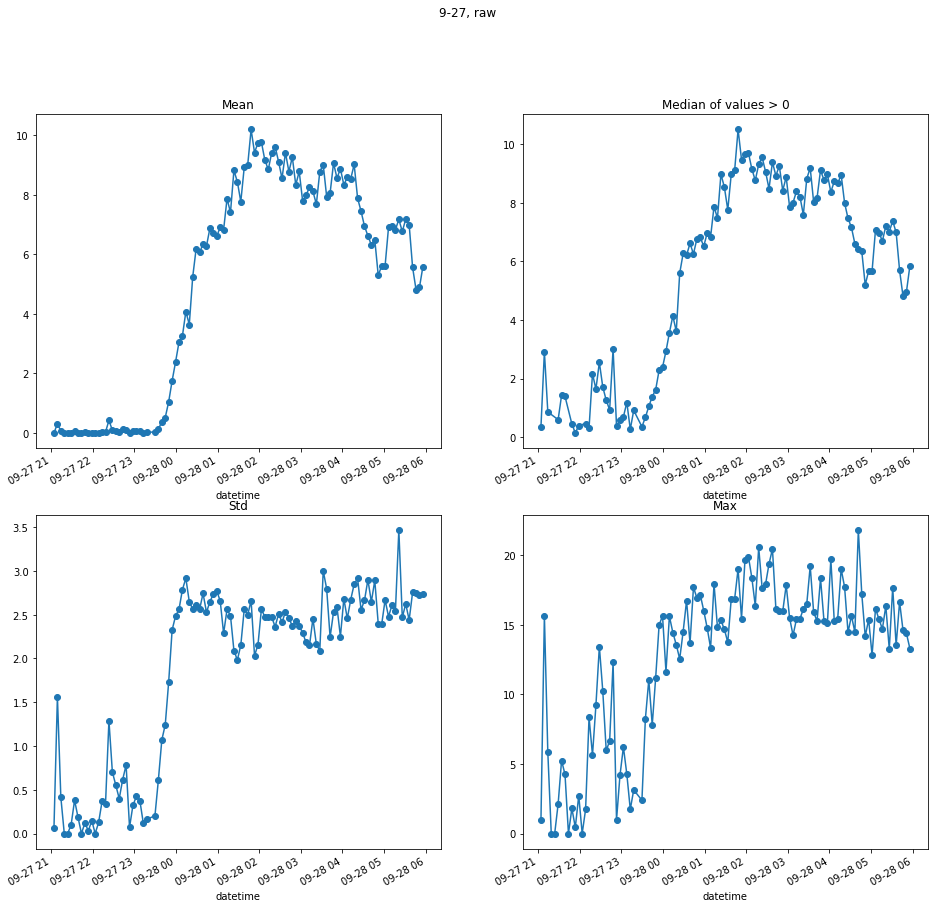

In [70]:
night_scans = pd.concat(process_csv(f) for f in get_csvs_for_night(2017, 9,  27, 'raw'))
fig = ppu.plot_ts(night_scans)
fig.suptitle("9-27, raw")

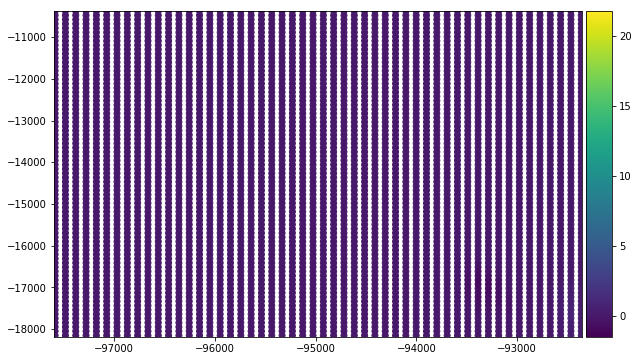

In [71]:
anim = ppu.plot_video(night_scans)
anim.save("data/videos/sep27_raw.mp4")

Text(0.5,0.98,'9-27, filtered')

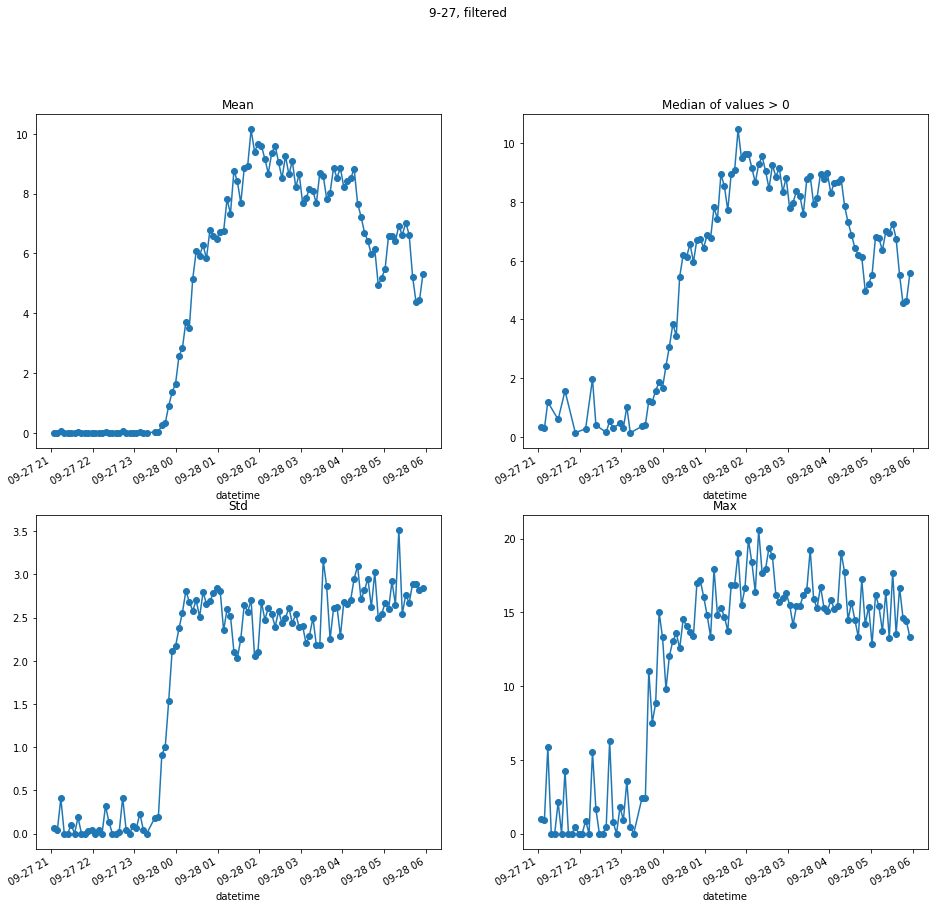

In [38]:
night_scans = pd.concat(process_csv(f) for f in get_csvs_for_night(2017, 9, 27, 'filtered'))
fig = ppu.plot_ts(night_scans)
fig.suptitle("9-27, filtered")

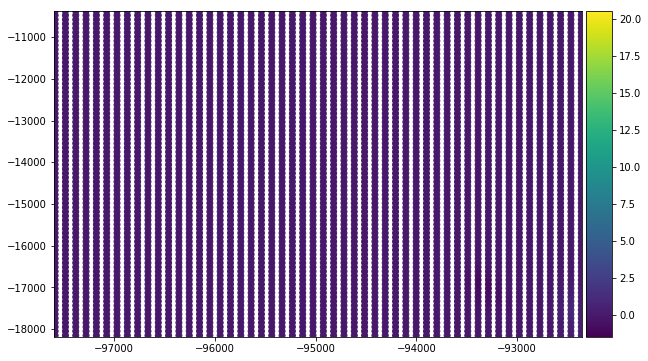

In [52]:
from IPython.display import HTML
anim = ppu.plot_video(night_scans)
anim.save("data/videos/sep27_cut.mp4")

In [64]:
anim.save("data/videos/sep27_cut.mp4")

### Now, find a bad weather night in october

In [3]:
maxs = []
for night in range(1, 32):
    night_scans = pd.concat(process_csv(f) for f in get_csvs_for_night(2017, 10,  night, 'raw'))
    maxs.append((night, night_scans.dbzh.max()))
    
sorted(maxs, key=lambda x: x[1], reverse=True)[:5]

[(22, 77.73225265831758),
 (21, 70.1426677595103),
 (29, 45.004970478343296),
 (18, 43.14533033320093),
 (20, 40.97392656346278)]

### So, according to [this link](https://www.timeanddate.com/weather/usa/brooklyn/historic?month=10&year=2017), 10-29 night had some rain, but what about the 70dbzh values on 10-21 and 10-22??

In [4]:
night_scans_raw = pd.concat(process_csv(f) for f in get_csvs_for_night(2017, 10,  29, 'raw'))
night_scans_filt = pd.concat(process_csv(f) for f in get_csvs_for_night(2017, 10,  29))


Text(0.5,0.98,'10-29, raw')

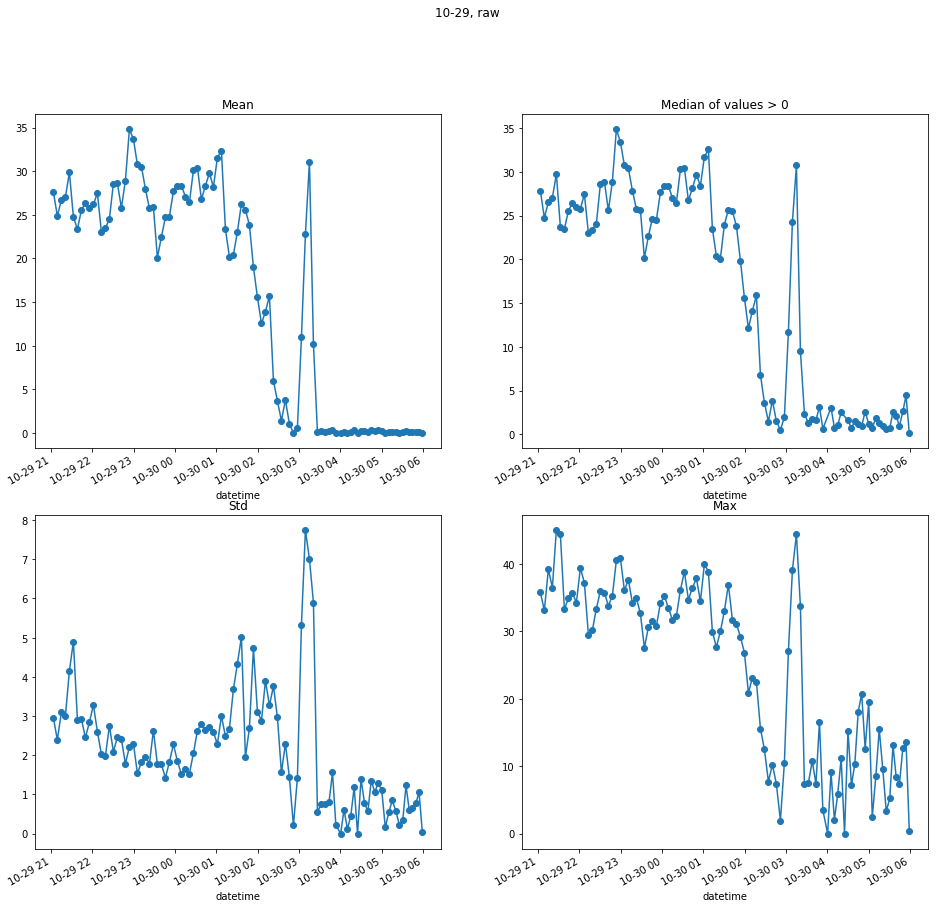

In [5]:
fig = ppu.plot_ts(night_scans_raw)
fig.suptitle("10-29, raw")

Text(0.5,0.98,'10-29, filt')

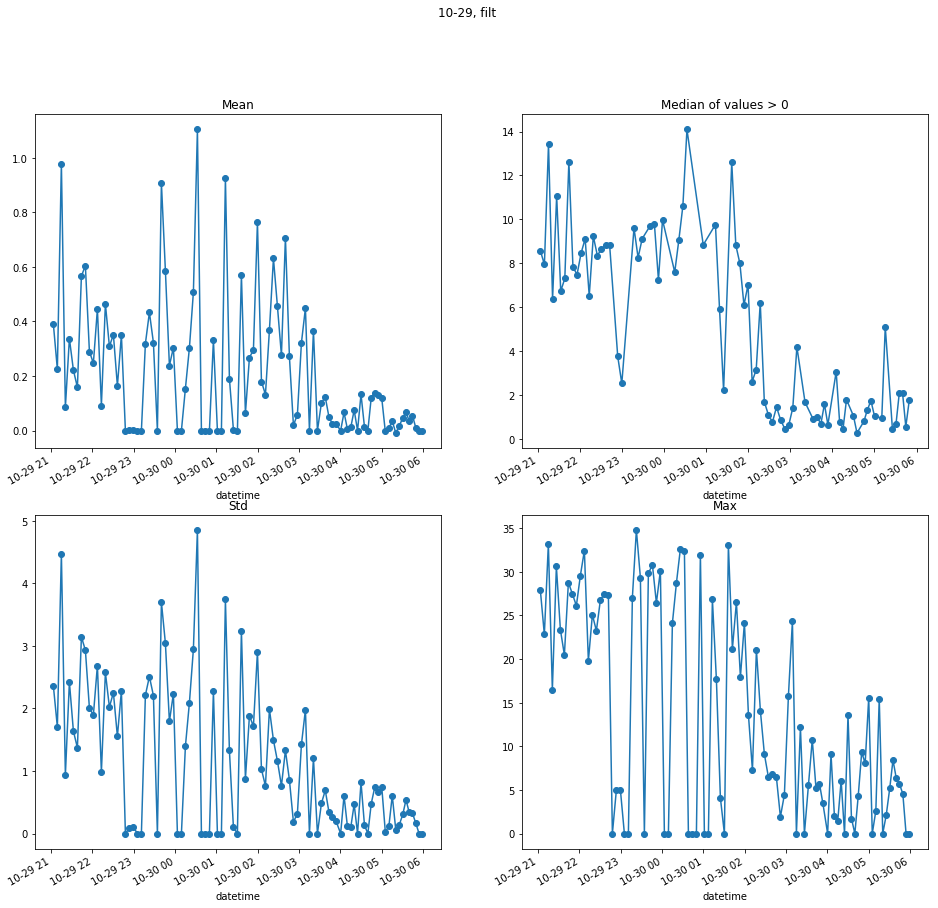

In [6]:
fig = ppu.plot_ts(night_scans_filt)
fig.suptitle("10-29, filt")

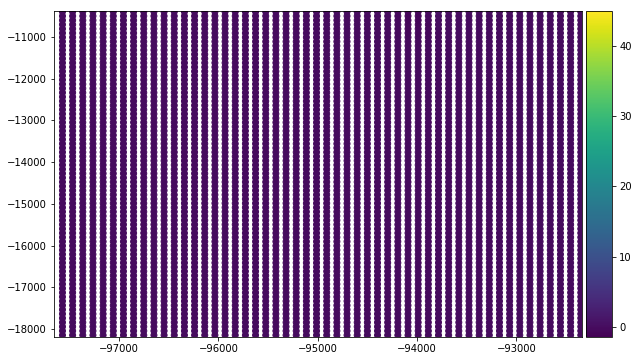

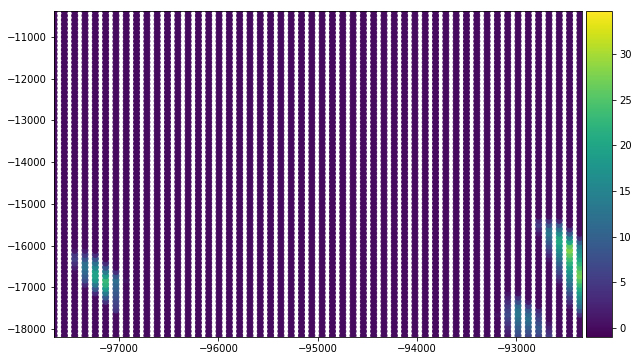

In [69]:
anim = ppu.plot_video(night_scans_raw)
anim.save("oct28_raw.mp4")
anim = ppu.plot_video(night_scans_filt)
anim.save("oct28_filt.mp4")

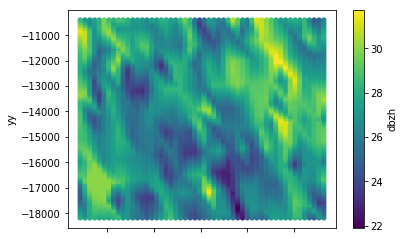

In [12]:
night_scans_raw[night_scans_raw.datetime == '2017-10-30T00:15:04.000000000'].plot('xx', 'yy', c='dbzh',
                                                                                  kind='scatter', cmap='viridis')

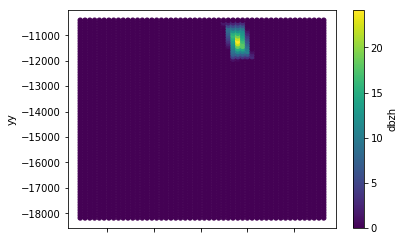

In [13]:
night_scans_filt[night_scans_filt.datetime == '2017-10-30T00:15:04.000000000'].plot('xx', 'yy', c='dbzh',
                                                                                  kind='scatter', cmap='viridis')

Text(0.5,0.98,'9-27, raw')

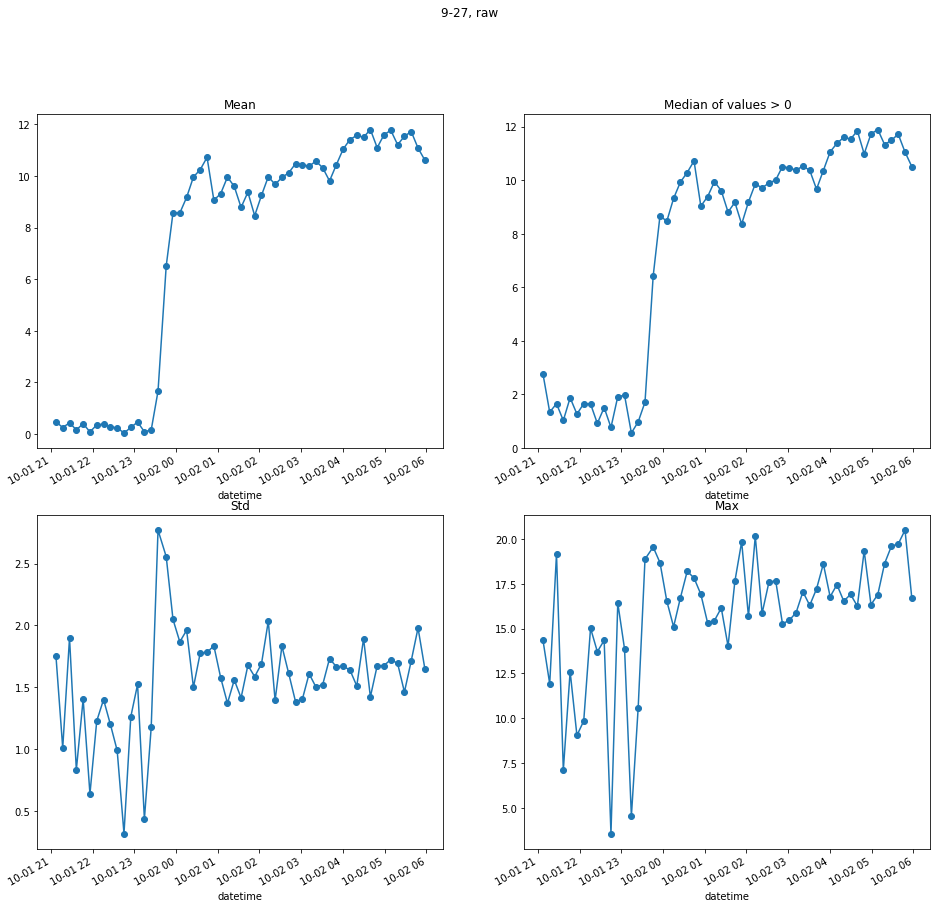

In [12]:
night_scans = pd.concat(process_csv(f) for f in get_csvs_for_night(2017, 10,  1, 'raw'))
fig = ppu.plot_ts(night_scans)
fig.suptitle("9-27, raw")

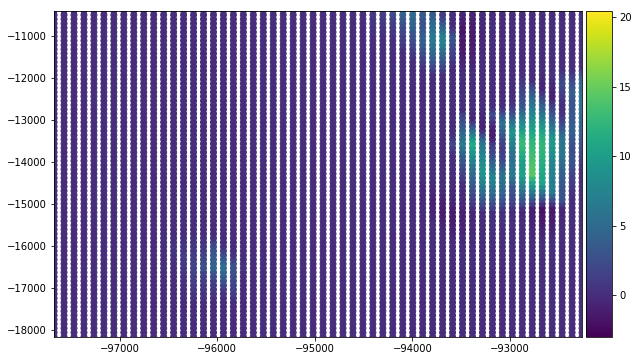

In [14]:
anim = ppu.plot_video(night_scans)
anim.save("oct01_new.mp4")
